# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

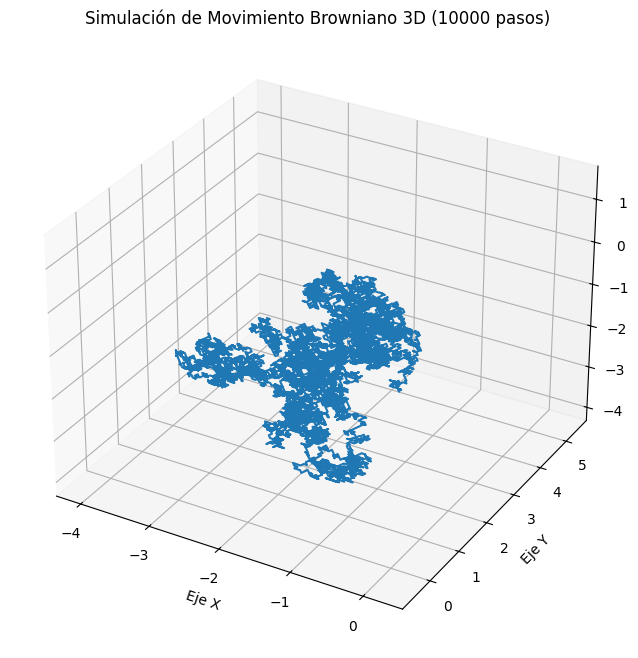

In [66]:
def caminata_browniana_trayectoria(pasos, dt):
    x = np.zeros(pasos + 1)
    y = np.zeros(pasos + 1)
    z = np.zeros(pasos + 1)
    paso_dt = np.sqrt(dt)
    for i in range(1, pasos + 1):
        #(+1 o -1)
        paso_x = np.random.choice([1, -1])
        paso_y = np.random.choice([1, -1])
        paso_z = np.random.choice([1, -1])
        x[i] = x[i-1] + paso_x * paso_dt
        y[i] = y[i-1] + paso_y * paso_dt
        z[i] = z[i-1] + paso_z * paso_dt
    return x, y, z
pasos = 10000  # 10 segundos con dt=0.001
dt = 0.001

x, y, z = caminata_browniana_trayectoria(pasos, dt)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_title(f'Simulación de Movimiento Browniano 3D ({pasos} pasos)')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.grid(True)
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [67]:

def caminata_browniana_final(pasos, dt):
    pasos_aleatorios = (np.random.randint(0, 2, size=(pasos, 3)) * 2 - 1)
    paso_dt = np.sqrt(dt)
    pasos_con_dt = pasos_aleatorios * paso_dt
    posicion_final = np.sum(pasos_con_dt, axis=0)
    return posicion_final[0], posicion_final[1], posicion_final[2]

pasos = 10000
dt = 0.001

pos_final = caminata_browniana_final(pasos, dt)
print(f"Posición final de una simulación: {pos_final}")

Posición final de una simulación: (np.float64(3.9212242986087986), np.float64(-1.7076299364909264), np.float64(0.06324555320336775))


Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [68]:
# Parámetros de Montecarlo
N = 1000 
pasos = 10000
dt = 0.001
resultados = []
for i in range(N):
    resultados.append(caminata_browniana_final(pasos, dt))

resultados_np = np.array(resultados)
condicion_x = resultados_np[:, 0] > 1
condicion_y = resultados_np[:, 1] > 2
condicion_z = resultados_np[:, 2] > 0

condicion_total = condicion_x & condicion_y & condicion_z

probabilidad = condicion_total.mean()

print(f"Resultados de las primeras 5 simulaciones (x, y, z):\n {resultados_np[:5]}")
print(f"\nNúmero de simulaciones (N): {N}")
print(f"Probabilidad de que (x > 1, y > 2, z > 0): {probabilidad:.4f}")


Resultados de las primeras 5 simulaciones (x, y, z):
 [[-7.65271194  1.70762994 -2.08710326]
 [ 6.00832755  6.07157311  0.44271887]
 [ 2.0238577   5.43911758 -1.70762994]
 [-6.07157311 -1.51789328  4.68017094]
 [-2.15034881  0.37947332  0.82219219]]

Número de simulaciones (N): 1000
Probabilidad de que (x > 1, y > 2, z > 0): 0.0550


#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

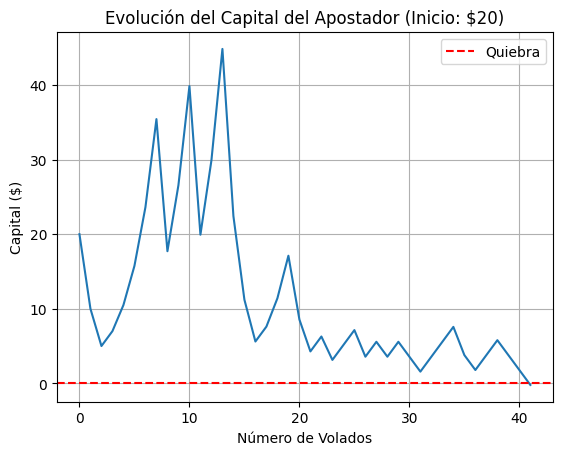

El apostador quebró después de 41 volados.


In [69]:
def apostador_arriesgado_trayectoria(capital_inicial):
    capital = capital_inicial
    historial_capital = [capital]
    while capital > 0:
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        volado = np.random.choice([1, -1])
        capital += volado * apuesta
        
        historial_capital.append(capital)
    return historial_capital
capital_inicial = 20  #
trayectoria_quiebra = apostador_arriesgado_trayectoria(capital_inicial)
plt.plot(trayectoria_quiebra)
plt.title(f'Evolución del Capital del Apostador (Inicio: ${capital_inicial})')
plt.xlabel('Número de Volados')
plt.ylabel('Capital ($)')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', label='Quiebra')
plt.legend()
plt.show()

print(f"El apostador quebró después de {len(trayectoria_quiebra) - 1} volados.")

In [70]:
def simular_quiebra(capital_inicial):
    capital = capital_inicial
    volados = 0
    
    while capital > 0:
        if capital >= 6:
            apuesta = capital / 2
        else:
            apuesta = 2
        
        volado = np.random.choice([1, -1])
        capital += volado * apuesta
        volados += 1
    return volados

N = 10000  
capital_inicial = 20 

volados_para_quiebra = []

for i in range(N):
    volados_para_quiebra.append(simular_quiebra(capital_inicial))

volados_np = np.array(volados_para_quiebra)
promedio_volados = volados_np.mean()

print(f"Simulaciones (N): {N}")
print(f"Capital Inicial: ${capital_inicial}")
print(f"Número de volados promedio para quedar en quiebra: {promedio_volados:.2f}")

Simulaciones (N): 10000
Capital Inicial: $20
Número de volados promedio para quedar en quiebra: 26.31


3. Muestre un histograma del número de volados.

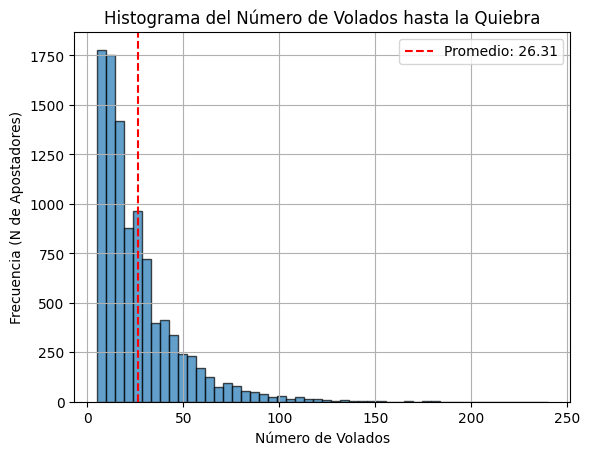

In [71]:
plt.hist(volados_np, bins=50, edgecolor='black', alpha=0.7)
plt.title('Histograma del Número de Volados hasta la Quiebra')
plt.xlabel('Número de Volados')
plt.ylabel('Frecuencia (N de Apostadores)')
plt.axvline(promedio_volados, color='red', linestyle='--', label=f'Promedio: {promedio_volados:.2f}')
plt.legend()
plt.grid(True)
plt.show()